##Does storing multiple variables in a single file affect read performance?

In [49]:
import sys
import os
from tempfile import NamedTemporaryFile
from gc import collect

sys.path.append('../util')
from meters import ThroughputMeter
import ncgen

import netCDF4
import numpy as np
import matplotlib.pyplot as plt

os.environ['TMPDIR'] = os.getenv('HOME') + '/tmp/'

In [50]:
results = []

# single var files, 3 var files, and 7 var files (perhaps some derived variables)
for num_vars in [1,3,7]:
    for unlim in [True, False]:
        print("Creating a NetCDF file with {} {}limited variables".format(num_vars, 'un' if unlim else ''))
        with NamedTemporaryFile(suffix='.nc', delete=False) as f:
            nc = ncgen.make_multivariable_nc(f.name, num_vars=num_vars)
            nc.close()
        nc = netCDF4.Dataset(f.name, 'r')
        with ThroughputMeter() as t:
            a = nc.variables['var_0'][:, :, :]
        nc.close
        del nc
        print("Removing {}".format(f.name))
        os.remove(f.name)
        f.close()
        collect()
        results.append((unlim, num_vars, t.megabytes_per_second(a)))
    

Creating a NetCDF file with 1 unlimited variables
Removing /root/tmp/tmpwe6dxf60.nc
353.100 MB in 0.34 seconds at 1039.738 MB / sec
Creating a NetCDF file with 1 limited variables
Removing /root/tmp/tmp7dsre8b9.nc
353.100 MB in 0.449 seconds at 785.724 MB / sec
Creating a NetCDF file with 3 unlimited variables
Removing /root/tmp/tmpxv44qzxi.nc
353.100 MB in 3.98 seconds at 88.620 MB / sec
Creating a NetCDF file with 3 limited variables
Removing /root/tmp/tmpjdi9rwhq.nc
353.100 MB in 3.43 seconds at 102.849 MB / sec
Creating a NetCDF file with 7 unlimited variables
Removing /root/tmp/tmphulzi2yx.nc
353.100 MB in 2.1 seconds at 168.294 MB / sec
Creating a NetCDF file with 7 limited variables
Removing /root/tmp/tmp1hlg2rta.nc
353.100 MB in 2.67 seconds at 132.137 MB / sec


In [51]:
a = np.array([result[2] for result in results]).reshape(2,3)

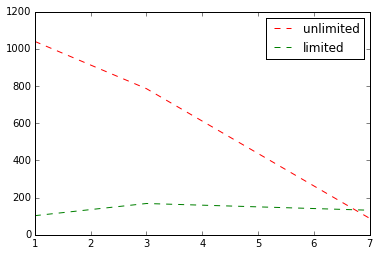

In [52]:
plt.plot([1,3,7], a[0,:], 'r--', label="unlimited")
plt.plot( [1,3,7], a[1,:], 'g--', label="limited")
plt.legend()